In [0]:
#### SAYA MENGGUNAKAN METODE CLUSTERING HIRARKI DAN (SVM OPTIONAL)

import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler 
import scipy 
import pylab
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster
import seaborn as sns

### svm 
#import data
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt  
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

In [0]:
!wget -O iris.csv https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

--2019-07-30 01:24:39--  https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3975 (3.9K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.88K  --.-KB/s    in 0s      

2019-07-30 01:24:44 (44.2 MB/s) - ‘iris.csv’ saved [3975/3975]



In [1]:
data = pd.read_csv("iris.csv")
data.head(1)

NameError: ignored

In [0]:
variable = data[['sepal.length','sepal.width','petal.length','petal.width']]
X = np.asarray(variable)
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [0]:
data.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [0]:
y = data[['variety']].values
y[0:10]



array([['Setosa'],
       ['Setosa'],
       ['Setosa'],
       ['Setosa'],
       ['Setosa'],
       ['Setosa'],
       ['Setosa'],
       ['Setosa'],
       ['Setosa'],
       ['Setosa']], dtype=object)

In [0]:
### changes lables of variety 
from sklearn import preprocessing
variety = preprocessing.LabelEncoder()
variety.fit(['Setosa','Versicolor','Virginica'])
y = variety.transform(y)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
print('Train set', X_train.shape, y_train.shape)
print('test set', X_test.shape,y_test.shape)

Train set (120, 4) (120,)
test set (30, 4) (30,)


In [0]:
### classification using svm 
svm1 = svm.SVC(kernel='rbf', gamma='auto')
svm1.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
from sklearn import svm
yhat = svm1.predict(X_test)
yhat [0:5]

array([2, 0, 2, 2, 2])

In [0]:
from sklearn import svm
yhat = svm1.predict(X_test)
yhat [0:5]

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89         5
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30

Confusion matrix, without normalization
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


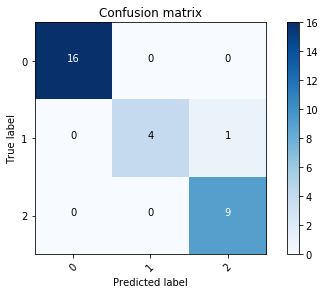

In [0]:
cnf_matrix = confusion_matrix(y_test,yhat,labels=[0,1,2])
np.set_printoptions(precision=3)
print (classification_report(y_test,yhat))

###plot normalize
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1','2'],normalize= False,  title='Confusion matrix')

In [0]:
f1_score(y_test,yhat, average='weighted')

0.9656920077972709

In [0]:
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9666666666666667

In [0]:
#########Interpretasi dari data

#mengunakan data iris.csv dengan menggunakan classifikasi svm didapatkan bahwa
#klasifikasi dengan pada variety setosa tidak terdapat kesalahan dimana 16 datase
#sentosa diklasifikasikan dengan benar, dan begitujuga
#pada variety virginica 9 datasetsnya di klasifikasikan dengan benar. 
#hanya saja kesalahan klasifikasi terjadi pada variety versicolor
#yang mengidentifikasi salah satu data keldalam virginica
#nilai klasifikasi yang baik ini juga didukung dengan tingkat akurasi senilai 0.965 
#dan jacard index senilai 0.966 dari kedua evaluasi ini bisa dipastikan bahwa klasifikasi
#dengan menggunakan svmpada data iris sudah sangat baik

In [0]:
####### CLUSTERRRRIIINGGGGGGGG
 ## tidak dibutuhkanya nilai normalisasi karen aparameter data dinilai telah sama 
  # dan range data yang tidak terlalu jauh berbeda
  
x = variable.values
x[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [0]:
leng = x.shape[0]
D =scipy.zeros([leng,leng])
for i in range(leng):
  for j in range (leng):
    D[i,j] = scipy.spatial.distance.euclidean(x[i],x[j])

In [0]:
dist_matrix = distance_matrix(x,x) 

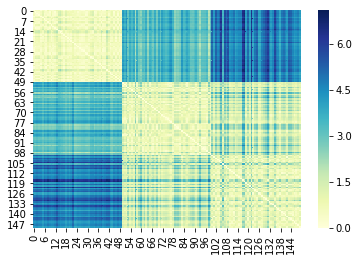

In [0]:
heatmap1 = sns.heatmap(dist_matrix,cmap="YlGnBu")

In [0]:
hi = hierarchy.linkage(D,'complete')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


In [0]:
k=3
cluster= fcluster(hi,k,criterion='maxclust')
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3], dtype=int32)

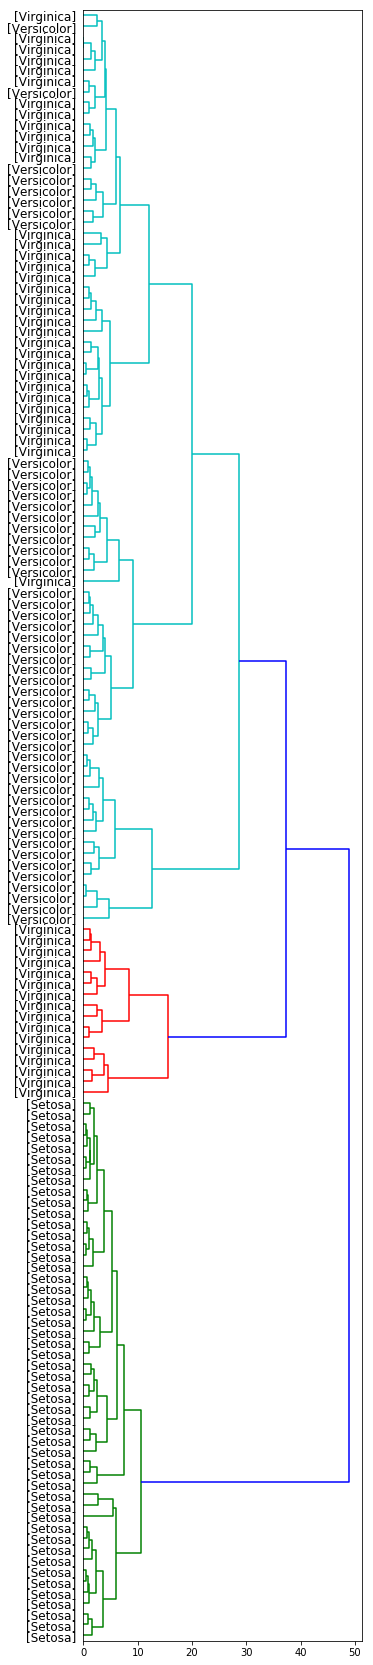

In [0]:
fig = pylab.figure(figsize=(5,30))
def llf(id):
    return '[%s]' % (data['variety'][id])
dendro = hierarchy.dendrogram(hi,leaf_label_func=llf,leaf_rotation=0, leaf_font_size=12, orientation='right')

In [0]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agglom.fit(x)
agglom.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
data['cluster_'] = agglom.labels_
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,cluster_
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'petal.width')

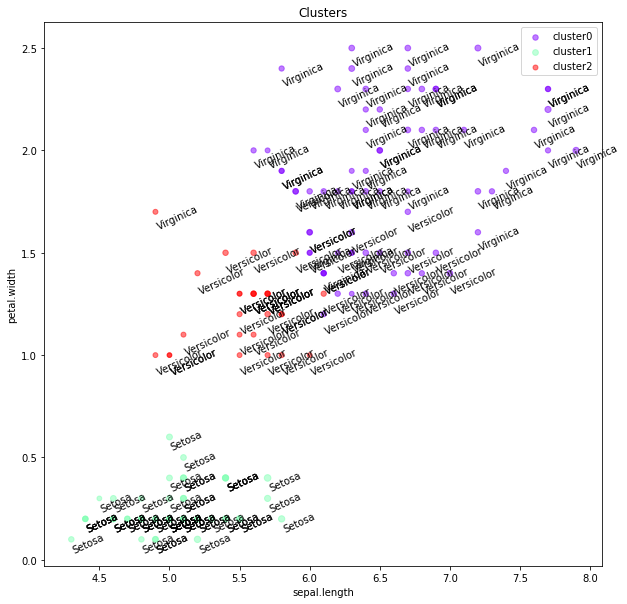

In [0]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(10,10))

for color, label in zip(colors, cluster_labels):
    subset = data[data.cluster_ == label]
    for i in subset.index:
            plt.text(subset['sepal.length'][i], subset['petal.width'][i],str(subset['variety'][i]), rotation=25) 
    plt.scatter(subset['sepal.length'], subset['petal.width'], s= (subset['sepal.width'])*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('sepal.length')
plt.ylabel('petal.width')



In [0]:
### dari hasil cluster denganmenggunakan hirarki cluster dengan melihat scatter plot diatas dapat diambill kesimpulan bahwa setiap kelompok telah berpusat pada clusterny masingmasing
# dimana perbedaan jelas dapat dilihat dari kelompok sentosa, sedangkan pada kelompok versicolor dan virginica masih adanya kemungkinan m=untukterjadi kesalah dalam pengelompokanya 